In [19]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
print ("libraries ok ! ")

libraries ok ! 


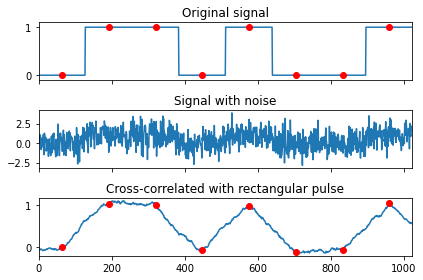

Wall time: 739 ms


In [22]:

%%time 

sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128 #Is correlatig with a a 'unit' signal made of ones  

clock = np.arange(64, len(sig), 128)   # red dots to mark the middle 
# Original Signal 
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')

#Noisy Signal 
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')

#Correlated Signal
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')

ax_corr.axhline(0.5, ls=':') #Create  dashed line at y= 0.5
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()


Filename: C:\Users\mrstu\idlworkspace_yalecalibration\chiron\raw\mir7\210208\chi210208.1040.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     129   (1432, 4112)   int16 (rescales to uint16)   
(4112, 1432)


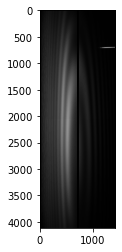

In [2]:


file =r"C:\Users\mrstu\idlworkspace_yalecalibration\chiron\raw\mir7\210208\chi210208.1040.fits"
hdu_list = fits.open(file)
hdu_list.info()

image_data = hdu_list[0].data
print (image_data.shape)

plt.imshow(image_data, cmap='gray')


In [3]:
%matplotlib notebook
from ipympl import *

In [4]:


intesities =image_data[2000  ,  0 :1431]

fig, ax = plt.subplots()
fig.set_figwidth(40) 
fig.set_figheight(5)

# fig.canvas.toolbar_visible = False
# fig.canvas.header_visible = False
# fig.canvas.resizable = True

ax.plot(intesities)

ax.set(xlabel='time', ylabel='intensities',
       title='cross dipersion direction ')
ax.grid()
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

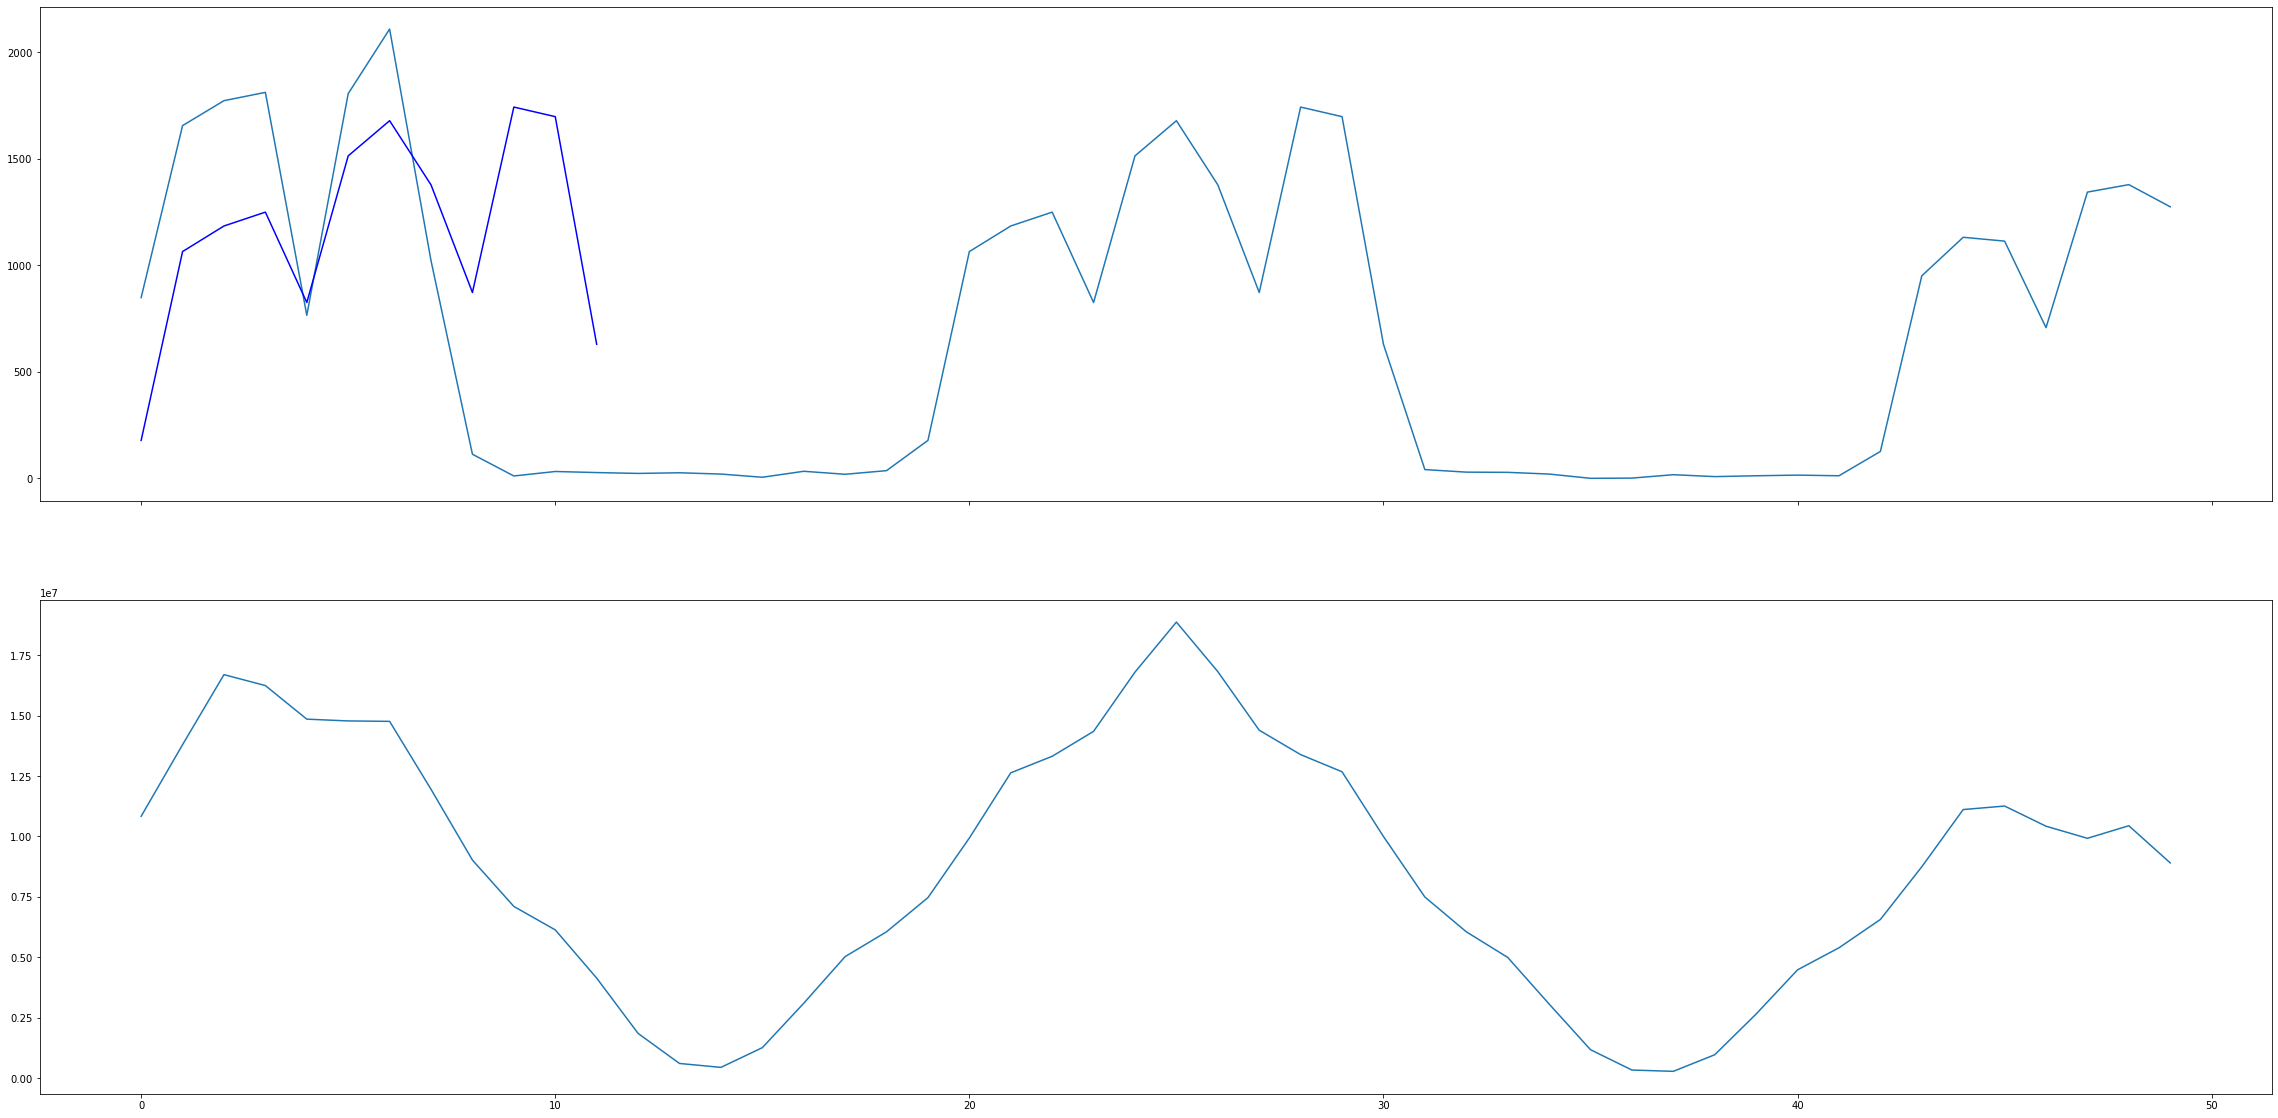

 ----------ABOUT THE SHIFT : 
25


In [92]:
# %matplotlib inline  # to stop the interactive mode of plottting 


section = image_data[2000  , 1000:1050]  



min_val = float(min(section) )  # hasto be a float 
section = section - min_val 

my_order =image_data[2000, 1019:1031]  - min_val 
 
# print (section.size)
# print (my_order.size)


corr = signal.correlate(section, my_order , mode='same')   #Is correlatig with a a 'unit' signal made of ones  

# print (corr.size)
fig, (ax_orig, ax_corr) = plt.subplots(2, 1, sharex=True)

fig.set_figwidth(40) 
fig.set_figheight(20)



ax_orig.plot(section)
ax_orig.plot(my_order,  'b-' ) 
ax_corr.plot(corr ) 


plt.show()

print (" ----------ABOUT THE SHIFT : ") 
corr = list(corr)
print (corr.index(max(corr))  )



In [ ]:
print (mx)